## Задание 4

Продемонстрируйте, что скорость сходимости к нормальному распределению в рамках центральной предельной теоремы может быть различной для различных распределений.

In [1]:
import scipy.stats

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="serif", font_scale=1.1)
plt.rcParams['figure.dpi'] = 100

In [2]:
def generate_sample(n, dist):
    return np.sqrt(n) * (np.mean(dist.rvs(size=n)) - dist.mean()) / dist.std()

Будем увеличивать n с шагом **в** 2 раза. 
Для проверки на качество сходимости будем генерировать 1000 сэмплов и смотреть на расстрояние Колмогорова-Смирнова.
Также можно смотреть на p-value для теста Колмогорова-Смирнова.

In [3]:
def simulate(dist_names, samples=42_000, max_degree = 12):
    for dist_name in dist_names:
        print(dist_name)
        dist = getattr(scipy.stats, dist_name)
        ns = [2 ** i for i in range(max_degree)]
        ks_dist = []

        for n in ns:
            ds = [np.sqrt(n) * (np.mean(dist.rvs(size=n)) - dist.mean()) / dist.std() for _ in range(samples)]
            res = scipy.stats.kstest(ds, 'norm')
            ks_dist.append(res[0])
            print(f'N = {n}:', res)

        plt.plot(ks_dist, label=dist_name)
        print()
    
    plt.xticks(range(max_degree), ns)
    plt.ylabel('ks distance')
    plt.xlabel('n')
    plt.legend()
    plt.show()


## Симуляции
* Экспоненциальное распределение, 
* Арксинусоидальное распределение, 
* Распределение Лапласа.

arcsine
N = 1: KstestResult(statistic=0.09640617670208307, pvalue=0.0)
N = 2: KstestResult(statistic=0.02994985667946659, pvalue=3.784699075487001e-33)
N = 4: KstestResult(statistic=0.013420143660112016, pvalue=5.380715400706892e-07)
N = 8: KstestResult(statistic=0.005718617084609967, pvalue=0.12820390235636006)
N = 16: KstestResult(statistic=0.0039850505187507546, pvalue=0.5172382829566289)
N = 32: KstestResult(statistic=0.00550899170240704, pvalue=0.15619577672200324)
N = 64: KstestResult(statistic=0.0032474766587990977, pvalue=0.7675717977330971)
N = 128: KstestResult(statistic=0.0037134337766222547, pvalue=0.608637198806928)
N = 256: KstestResult(statistic=0.004369406369505113, pvalue=0.3990270631189339)
N = 512: KstestResult(statistic=0.004424841875693475, pvalue=0.3833795591897269)
N = 1024: KstestResult(statistic=0.0031558008704267726, pvalue=0.7970331504106621)
N = 2048: KstestResult(statistic=0.00349328108409111, pvalue=0.6846133786082857)

expon
N = 1: KstestResult(statistic=

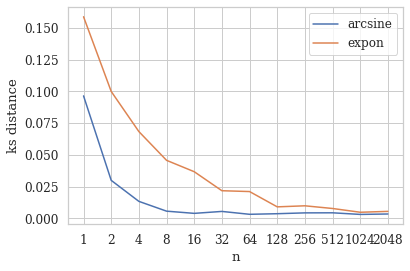

In [4]:
dist_names = ['arcsine', 'expon']
simulate(dist_names)

### Вывод:
Судя по графику и по p-values, можно сделать вывод, что заметно быстрее сошлось арксинусоидальное распределение.


## Почему?

Оценку скорости сходимости к ЦПТ также можно провести с помощью неравества [Берри-Эссеена](https://en.wikipedia.org/wiki/Berry–Esseen_theorem). 
В нём утверждается, что скорость сходимости пропорциональна третьему абсолютному центральному моменту. Давайте же проверим этот факт!

In [5]:
def third_absolute_moments(dist_names):
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        # don't need centering becouse loc=0
        print(f'{dist_name}: {dist.expect(lambda x: abs(x ** 3))}')
        
third_absolute_moments(dist_names)

arcsine: 0.31249999999970735
expon: 6.0


Мы видим, что у экспоненциального распределения третий центральный абсолютный момент заметно больше, чем у арксинусоидального. То есть полученная картина совпадает с нашими результатами на предыдущем шаге.